###Importing Libraries

In [ ]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from tabulate import tabulate

###Load the dataset
The dataset used in this notebook was sourced from Kaggle and it contains information of various Crops along with the factors.

In [ ]:
crop= pd.read_csv('/content/drive/MyDrive/ML/Crop_recommendation.csv')

*ATTRIBUTES DESCRIPTION:*
*  **N -** ratio of Nitrogen content in the soil
*   **P -** ratio of Phosphorus content in the soil
*   **K -** ratio of Potassium content in the soil
*   **temperature -** temperature in degree Celsius
*   **humidity -** relative humidity in %
*   **ph -** ph value of the soil
*   **rainfall -** rainfall in mm
*   **label -** Crop Type







###Exploratory Data Analysis

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.shape

(2200, 8)

In [ ]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

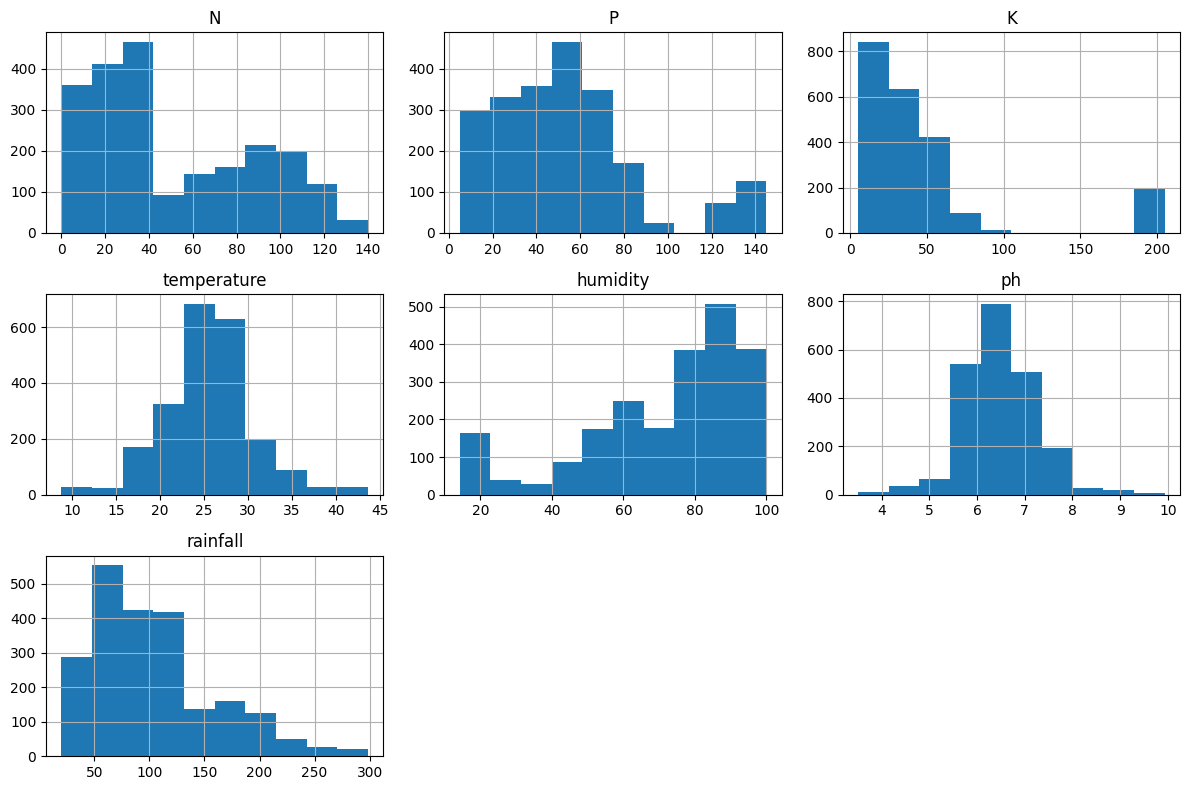

In [ ]:
# Histogram

crop.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

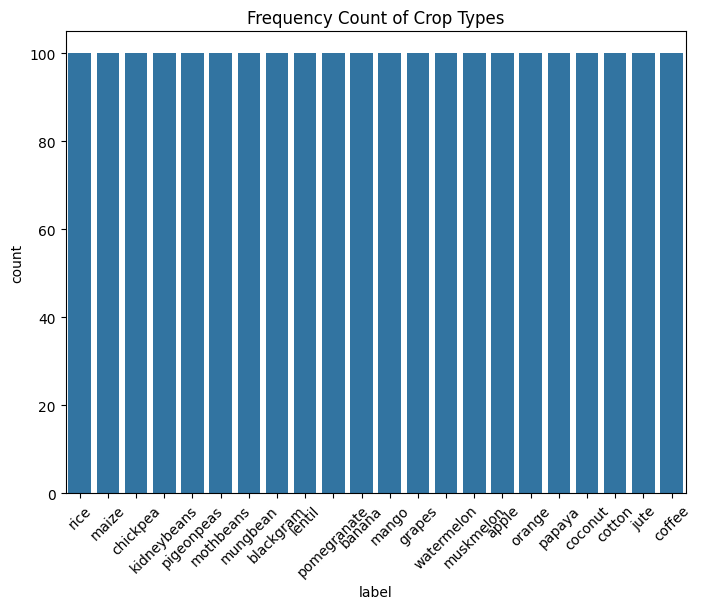

In [ ]:
# Bar plot of 'label'

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=crop)
plt.title('Frequency Count of Crop Types')
plt.xticks(rotation=45)
plt.show()

The equal bar sizes of the 22 crops in the bar plot indicate a *balanced distribution of crop types* in the dataset.

<ipython-input-14-b4d3fd03f5bd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crop.corr(), center = 0, annot = True)


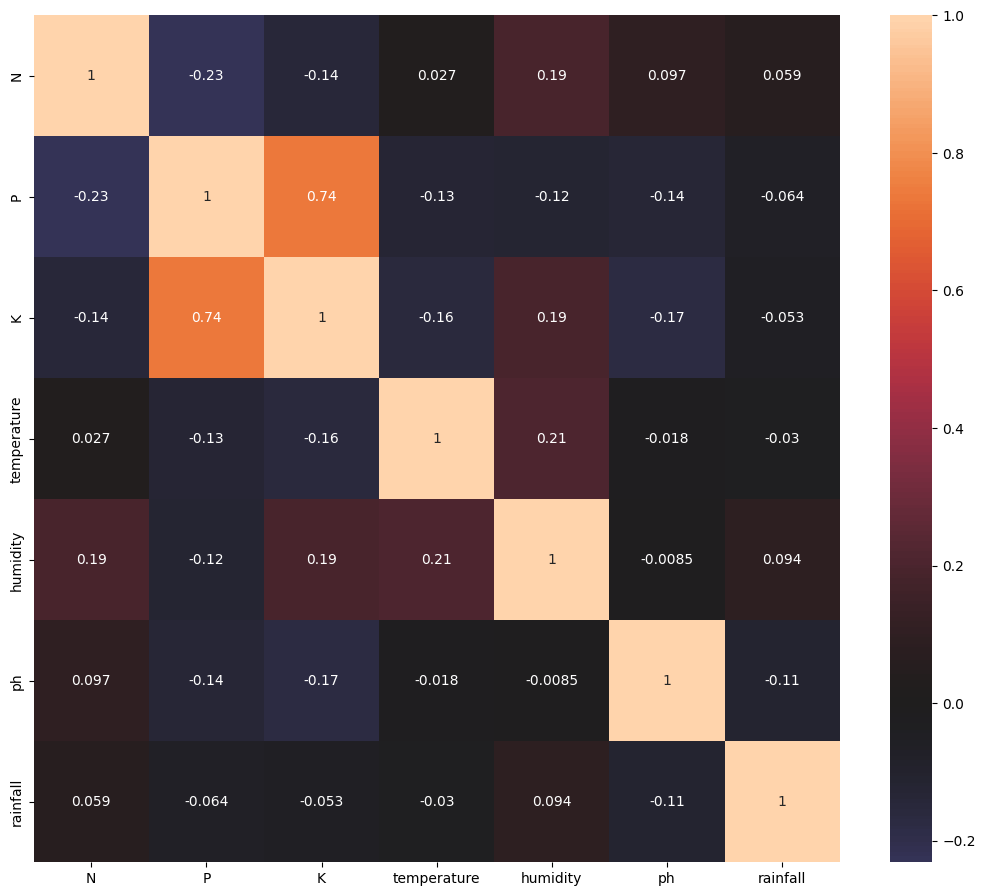

In [ ]:
# Correlation using heatmap

plt.figure(figsize=(13,11))
sns.heatmap(crop.corr(), center = 0, annot = True)
plt.show()

###Data Preprocessing

In [ ]:
# Checking for missing values

crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
# Encoding categorical column into numerical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
crop['label'] = le.fit_transform(crop['label'])

In [ ]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [ ]:
# Extracting independent and dependent variables

x = crop.iloc[:,:-1].values
y = crop.iloc[:,-1].values

Auto Data Split

In [ ]:

def performance(x_train, x_test, y_train, y_test, classifier):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

def find_optimal_split_ratio(x_scaled, y, classifiers, splitting_ratios):
    optimal_ratio = None
    max_accuracy = 0.0
    header = ["Test Ratio", "Classifier", "Accuracy", "Precision", "Recall", "F1-score"]
    table_data = []
    for test_ratio in splitting_ratios:
        x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=test_ratio, random_state=42)
        for classifier_name, classifier in classifiers.items():
            accuracy, precision, recall, f1 = performance(x_train, x_test, y_train, y_test, classifier)
            row_data = [f"{test_ratio:.2f}", classifier_name,
                        f"{accuracy:.4f}", f"{precision:.4f}",
                        f"{recall:.4f}", f"{f1:.4f}"]
            table_data.append(row_data)
            if accuracy > max_accuracy:
                max_accuracy = accuracy
                optimal_ratio = test_ratio
    print("\nOptimal Splitting Ratio:", optimal_ratio)
    print(tabulate(table_data, headers=header, tablefmt="grid"))

In [ ]:
# Define the classifiers

classifiers = {'Random Forest': RandomForestClassifier(),
              'Support Vector Machine': SVC(),
              'Decision Tree': DecisionTreeClassifier(),
              'KNN': KNeighborsClassifier()
              }

In [ ]:
# Define Splitting ratios to evaluate

splitting_ratios = np.linspace(0.1, 0.9)

In [ ]:
# Find the Optimal Splitting ratio
find_optimal_split_ratio(x, y, classifiers, splitting_ratios)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning


Optimal Splitting Ratio: 0.1
+--------------+------------------------+------------+-------------+----------+------------+
|   Test Ratio | Classifier             |   Accuracy |   Precision |   Recall |   F1-score |
+==============+========================+============+=============+==========+============+
|         0.1  | Random Forest          |     1      |      1      |   1      |     1      |
+--------------+------------------------+------------+-------------+----------+------------+
|         0.1  | Support Vector Machine |     0.9727 |      0.9766 |   0.9727 |     0.9725 |
+--------------+------------------------+------------+-------------+----------+------------+
|         0.1  | Decision Tree          |     0.9955 |      0.9958 |   0.9955 |     0.9954 |
+--------------+------------------------+------------+-------------+----------+------------+
|         0.1  | KNN                    |     0.9773 |      0.9812 |   0.9773 |     0.9766 |
+--------------+------------------------

###Model Building

In [ ]:
# Splitting into train and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print(x_train.shape)

(1760, 7)


In [ ]:
print(x_test.shape)

(440, 7)


In [ ]:
# RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,random_state=42)
rfc.fit(x_train, y_train)
y_pred1 = rfc.predict(x_test)

In [ ]:
print('Random Forest Classifier\n')
rfc_acc = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {rfc_acc}')
rfc_precision = precision_score(y_test, y_pred1, average='weighted')
print(f'Precision: {rfc_precision}')
rfc_recall = recall_score(y_test, y_pred1, average='weighted')
print(f'Recall: {rfc_recall}')
rfc_f1 = f1_score(y_test, y_pred1, average='weighted')
print(f'F1-score: {rfc_f1}')

Random Forest Classifier

Accuracy: 0.9931818181818182
Precision: 0.9937348484848485
Recall: 0.9931818181818182
F1-score: 0.9931754816901672


In [ ]:
# K-Neighbors Classifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred2 = knn.predict(x_test)

In [ ]:
print('K-Nearest Neighbor\n')
knn_acc = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {knn_acc}')
knn_precision = precision_score(y_test, y_pred2, average='weighted')
print(f'Precision: {knn_precision}')
knn_recall = recall_score(y_test, y_pred2, average='weighted')
print(f'Recall: {knn_recall}')
knn_f1 = f1_score(y_test, y_pred2, average='weighted')
print(f'F1-score: {knn_f1}')

K-Nearest Neighbor

Accuracy: 0.9704545454545455
Precision: 0.9739764067350275
Recall: 0.9704545454545455
F1-score: 0.97031128472575


In [ ]:
# Support Vector Classsifier

svm = SVC(random_state=42)
svm.fit(x_train, y_train)
y_pred3 = svm.predict(x_test)

In [ ]:
print('Support Vector Classifier\n')
svm_acc = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {svm_acc}')
svm_precision = precision_score(y_test, y_pred3, average='weighted')
print(f'Precision: {svm_precision}')
svm_recall = recall_score(y_test, y_pred3, average='weighted')
print(f'Recall: {svm_recall}')
svm_f1 = f1_score(y_test, y_pred3, average='weighted')
print(f'F1-score: {svm_f1}')

Support Vector Classifier

Accuracy: 0.9613636363636363
Precision: 0.9672692837465565
Recall: 0.9613636363636363
F1-score: 0.9612434056986235


In [ ]:
# Decision Tree Classifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred4 = dt.predict(x_test)

In [ ]:
print('Decision Tree Classifier\n')
dt_acc = accuracy_score(y_test, y_pred4)
print(f'Accuracy: {dt_acc}')
dt_precision = precision_score(y_test, y_pred4, average='weighted')
print(f'Precision: {dt_precision}')
dt_recall = recall_score(y_test, y_pred4, average='weighted')
print(f'Recall: {dt_recall}')
dt_f1 = f1_score(y_test, y_pred4, average='weighted')
print(f'F1-score: {dt_f1}')

Decision Tree Classifier

Accuracy: 0.9863636363636363
Precision: 0.9868055555555556
Recall: 0.9863636363636363
F1-score: 0.9863152866630287





*   Random forest Classifier followed with an accuracy of **0.993**

*   K Neighbors Classifier has an accuracy of **0.970**
*   Support Vector Classsifier follows as accuracy of **0.961**
*   Decision Tree Model has an accuracy of **0.986**



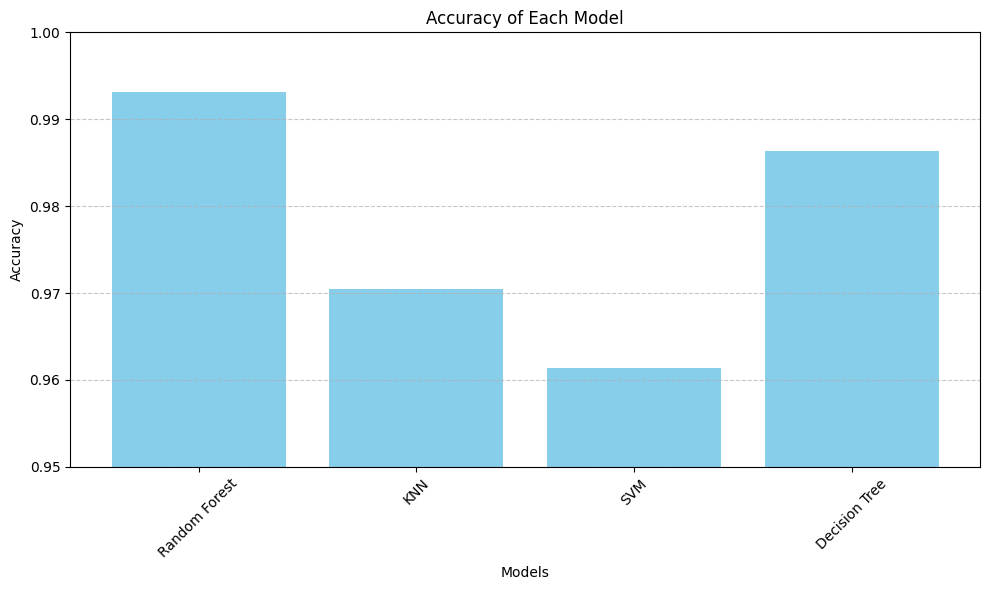

In [ ]:
model_names = ['Random Forest', 'KNN', 'SVM', 'Decision Tree']
accuracies = [rfc_acc, knn_acc, svm_acc, dt_acc]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Model')
plt.ylim(0.95, 1)  # Set y-axis limit to ensure all accuracies are visible
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better visualization
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The *Random Forest Classifier* showed the highest accuracy of **99%** among the models tested, making it more effective model for predicting the crops based on the features given in this dataset.